<a href="https://colab.research.google.com/github/sahug/tensorflow-colab/blob/Tensorflow_2_0_2D_CNN_MNIST_Digit_Recognization/Tensorflow_2_0_2D_CNN_MNIST_Digit_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple 2D CNN**

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 41kB/s 
     |████████████████████████████████| 3.8MB 41.3MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 450kB 42.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=51c9f7714ede1db6a713fe937418090300bd706d848d3c19ee445cb0f216f1ed
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout

In [5]:
print(tf.__version__)

2.0.0


In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load_data splits the dataset in to train and test tupples.

11493376/11490434 [==============================] - 0s 0us/step


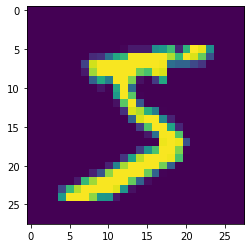

In [8]:
plt.imshow(x_train[0])

In [9]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
x_train.max()

255

In [11]:
# Bringing all our datset between 1 and 0. To do that we are dividing our dataset by maxvalue. Which is 255.
x_train = x_train/255.0
x_test = x_test/255.0

In [13]:
# Reshapping our dataset
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [16]:
x_train[0].shape

(28, 28, 1)

In [18]:
input_shape = x_train[0].shape

In [19]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=input_shape)) #Layer 1

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu")) #Layer 2

model.add(MaxPool2D(pool_size=(2, 2))) # Layer 3. Adding MaxPool Layer

model.add(Dropout(0.25)) # Layer 4. Adding dropout layer. 25% of neurons will randomly drop bfore going to next layer.

model.add(Flatten()) # Layer 5. Adding Flatten Layer. Converts to 2D.

model.add(Dense(128, activation="relu")) # Layer 6. Adding Dense Layer.

model.add(Dropout(0.5)) # Layer 7. Adding dropout layer. 50% of neurons will randomly drop bfore going to next layer.

model.add(Dense(10, activation="softmax")) # Layer 8. Output Layer. 10 is the number of different output. 0 - 9. 


In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [22]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.2273 - accuracy: 0.9301 - val_loss: 0.0543 - val_accuracy: 0.9828
Epoch 2/10
60000/60000 [==============================] - 165s 3ms/sample - loss: 0.0819 - accuracy: 0.9755 - val_loss: 0.0333 - val_accuracy: 0.9878
Epoch 3/10
60000/60000 [==============================] - 166s 3ms/sample - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.0311 - val_accuracy: 0.9901
Epoch 4/10
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.0486 - accuracy: 0.9854 - val_loss: 0.0310 - val_accuracy: 0.9898
Epoch 5/10
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0426 - accuracy: 0.9867 - val_loss: 0.0319 - val_accuracy: 0.9893
Epoch 6/10
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0348 - accuracy: 0.9889 - val_loss: 0.0257 - val_accuracy: 0.9922
Epoch 7/10
60000/60000 [==========================

In [24]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.027409849893158252, 0.9924]

In [25]:
history.history

{'accuracy': [0.93015,
  0.9755333,
  0.98253334,
  0.98535,
  0.9866833,
  0.9889,
  0.9898667,
  0.99161667,
  0.99188334,
  0.99228334],
 'loss': [0.22725147167642912,
  0.08192219722867013,
  0.057796645031372704,
  0.04855991525550683,
  0.04263515802174807,
  0.034838094300280016,
  0.03145109619001547,
  0.02736832578703761,
  0.02586268189859887,
  0.023227200677618385],
 'val_accuracy': [0.9828,
  0.9878,
  0.9901,
  0.9898,
  0.9893,
  0.9922,
  0.9921,
  0.9908,
  0.9928,
  0.9924],
 'val_loss': [0.054328684568218884,
  0.03328525467994623,
  0.031105451645934954,
  0.030995711575681345,
  0.03193926449907012,
  0.025681282209046186,
  0.024276808693478234,
  0.0289579418570851,
  0.025304742700466887,
  0.02740984920969786]}

In [26]:
epoch_range = range(1, 11)

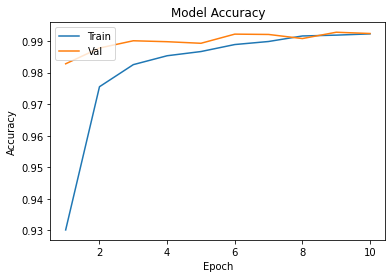

In [27]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["accuracy"])
plt.plot(epoch_range, history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

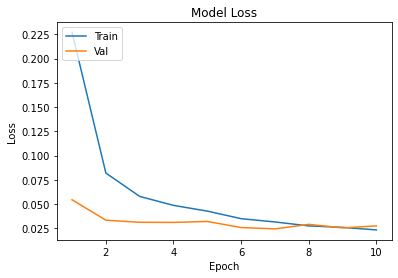

In [28]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()